<a href="https://colab.research.google.com/github/ValeriaPequeno/datasciencecoursera/blob/master/%5CmeusNotebooks%5CquarentenaDeDados_aula1_vmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meu primeiro Notebook
**Quarentena de dados**

**Aula 1**

In [ ]:
print("Meu nome é Valéria")

Meu nome é Valéria


In [ ]:
nome_do_filme = "Um dia de chuva"

In [ ]:
nome_do_filme

'Um dia de chuva'

In [ ]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um dataframe
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.sample(5)

,filmeId,titulo,genero
3809,5333,Bob le Flambeur (1955),Crime|Drama
4274,6239,Journey to the Center of the Earth (1959),Adventure|Children|Sci-Fi
4971,7584,Woman of the Year (1942),Comedy|Romance
7925,95499,Dragon Ball Z: Broly - The Legendary Super Sai...,Action|Adventure|Animation
9287,158254,Kindergarten Cop 2 (2016),Action|Comedy


In [ ]:
avaliacoes_filmes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes_filmes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
avaliacoes_filmes.columns = ["usuarioId", "filmeId", "classificacao", "data"]
avaliacoes_filmes.sample(5)

,usuarioId,filmeId,classificacao,data
45732,304,11,5.0,891173135
33532,226,52973,4.5,1188887134
39143,272,318,4.0,1532265940
11117,68,6709,3.0,1158535202
52858,346,7482,3.0,1094646977


In [ ]:
avaliacoes_filmes.shape
#primeira coluna: total de registos, segunda coluna: total de atributos

(100836, 4)

In [ ]:
avaliacoes_filme1 = avaliacoes_filmes.query("filmeId == 1")

In [ ]:
avaliacoes_filme1.describe()

,usuarioId,filmeId,classificacao,data
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [ ]:
avaliacoes_filme1["classificacao"].mean()
#média das classificações do filme 1

3.9209302325581397

In [ ]:
avaliacoes_filmes["classificacao"].mean()
#media das classificações de todos os filmes

3.501556983616962

In [ ]:
avaliacao_media_por_filme = avaliacoes_filmes.groupby("filmeId")["classificacao"].mean()
avaliacao_media_por_filme.head()
#média de todos os filmes

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: classificacao, dtype: float64

In [ ]:
filmes_com_media = filmes.join(avaliacao_media_por_filme,on="filmeId")
filmes_com_media.head()
#filmes join com avaliacao_media_por_filmes

,filmeId,titulo,genero,classificacao
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [ ]:
filmes_com_media.sort_values("classificacao", ascending=False).head(15)
#mostra os filmes ordenados na ordem decrescente por classificacao

,filmeId,titulo,genero,classificacao
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


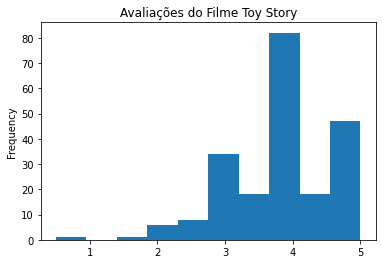

In [ ]:
avaliacoes_filme1["classificacao"].plot(kind="hist",title="Avaliações do Filme Toy Story")
#cria um gráfico de histogramas

# Desafio 1 do Paulo Silveira
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [ ]:
desafio1 = filmes_com_media[filmes_com_media["classificacao"].isnull()]
#obtém os filmes que não tem classificação
desafio1.head()

,filmeId,titulo,genero,classificacao
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN


In [ ]:
desafio1["filmeId"].count()
#conta quantos filmes não tem classificação

18

In [ ]:
desafio1.head(18)

,filmeId,titulo,genero,classificacao
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# Desafio 2 do Guilherme Silveira
Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [ ]:
filmes_com_media.head()

,filmeId,titulo,genero,classificacao
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [ ]:
#filmes_com_media.columns = ["filmeId","titulo","genero","nota_media"]
#maneira totó, existe uma que mude apenas a coluna que desejo?
#filmes_com_media.head()
#Sim, existe, veja abaixo:

In [ ]:
filmes_com_media.rename(columns={"classificacao":"nota_media"}, inplace=True)
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
# Or rename the existing DataFrame (rather than creating a copy):
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
filmes_com_media.head()

,filmeId,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3 do Guilherme Silveira
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [ ]:
avaliacao_total_votos_por_filme = avaliacoes_filmes.groupby("filmeId")["classificacao"].count()
avaliacao_total_votos_por_filme.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: classificacao, dtype: int64

In [ ]:
filmes_com_media_total_votos = filmes_com_media.join(avaliacao_total_votos_por_filme,on="filmeId")
filmes_com_media_total_votos.head()

,filmeId,titulo,genero,nota_media,classificacao
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [ ]:
filmes_com_media_total_votos.rename(columns={"classificacao":"total_votos"}, inplace=True)
filmes_com_media_total_votos.head()

,filmeId,titulo,genero,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# Desafio 4 do Thiago Gonçalves
Arredondar as médias (coluna de nota média) para duas casas decimais.

In [ ]:
filmes_com_media_total_votos.round(2)

,filmeId,titulo,genero,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


# Desafio 5 do Allan Spadini
Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [ ]:
generos = filmes_com_media_total_votos["genero"].str.split('|').tolist()
#separa os generos mas ficam em listas de listas, não é isso que eu quero
generos

In [ ]:

#Solução baseada em:https://medium.com/@sureshssarda/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e
# Step 1
# We start with creating a new dataframe from the series with FilmeId as the index
desafio5 = filmes_com_media_total_votos
novo_desafio5 = pd.DataFrame(desafio5.genero.str.split('|').tolist(), index=desafio5.filmeId).stack()
novo_desafio5.head(20)

filmeId   
1        0    Adventure
         1    Animation
         2     Children
         3       Comedy
         4      Fantasy
2        0    Adventure
         1     Children
         2      Fantasy
3        0       Comedy
         1      Romance
4        0       Comedy
         1        Drama
         2      Romance
5        0       Comedy
6        0       Action
         1        Crime
         2     Thriller
7        0       Comedy
         1      Romance
8        0    Adventure
dtype: object

In [ ]:
#Step 2 -- tornar o dataframe mais bonitinho
# We now want to get rid of the secondary index
# To do this, we will make filmeId as a column (it can't be an index since the values will be duplicate)
novo_desafio5 = novo_desafio5.reset_index([0, 'filmeId'])
novo_desafio5.head(20)

,filmeId,0
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
5,2,Adventure
6,2,Children
7,2,Fantasy
8,3,Comedy
9,3,Romance


In [ ]:
# Step 3
# The final step is to set the column names as we want them
novo_desafio5.columns = ['filmeId', 'genero']
novo_desafio5.head(20)

,filmeId,genero
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
5,2,Adventure
6,2,Children
7,2,Fantasy
8,3,Comedy
9,3,Romance


In [ ]:
novo_desafio5["genero"].unique()
#Resposta do desafio

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

# Desafio 6 da Thais André

> Indented block


Contar o número de aparições de cada genero.

In [ ]:
novo_desafio5.groupby("genero").count()

,filmeId
genero,
(no genres listed),34
Action,1828
Adventure,1263
Animation,611
Children,664
Comedy,3756
Crime,1199
Documentary,440
Drama,4361


# Desafio 7 do Guilherme Silveira
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

In [ ]:
desafio7 = novo_desafio5.groupby("genero").count()


In [ ]:
desafio7

,filmeId
genero,
(no genres listed),34
Action,1828
Adventure,1263
Animation,611
Children,664
Comedy,3756
Crime,1199
Documentary,440
Drama,4361


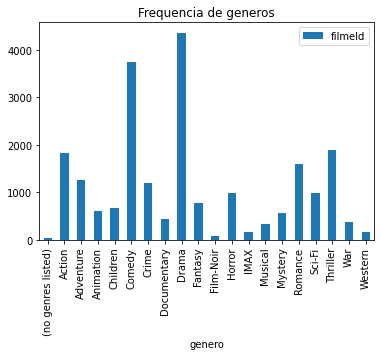

In [ ]:
desafio7.plot(kind="bar",title="Frequencia de generos")